In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import torch
import os
import cv2
import pickle
import random
import numpy as np
from tensorflow.keras.models import load_model, model_from_json
import sys

In [2]:
def sculptdata(images):
    img=cv2.imread(images)
    img=cv2.resize(img,(224,224))
    img=cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return img

In [3]:
from re import X


def maker(dataset):
    
    X,Y=[],[]

    random.shuffle(dataset)

    for feature,lable in dataset:
        X.append(feature)
        Y.append(lable)
        
    X=np.array(X).reshape(-1,224,224,3)
    Y=np.array(Y)

    return X,Y

In [4]:
fil=[]

pat="/media/ram/ubuntuspace/Explore/mechine/paper/MRI_brain_IMG/brain_tumor_dataset/Training"
for z in os.listdir(pat):
    lis=os.path.join(pat,z)
    #if os.path.isfile(z):
    ind=1
    print(lis)
    for y in os.scandir(lis): 
        tr_img=(os.path.join(pat,lis,y))
        #print(os.path.join(pat,z,y))
        tr_img=sculptdata(tr_img)
        fil.append([tr_img,ind])


/media/ram/ubuntuspace/Explore/mechine/paper/MRI_brain_IMG/brain_tumor_dataset/Training/glioma_tumor
/media/ram/ubuntuspace/Explore/mechine/paper/MRI_brain_IMG/brain_tumor_dataset/Training/meningioma_tumor
/media/ram/ubuntuspace/Explore/mechine/paper/MRI_brain_IMG/brain_tumor_dataset/Training/no_tumor
/media/ram/ubuntuspace/Explore/mechine/paper/MRI_brain_IMG/brain_tumor_dataset/Training/pituitary_tumor


In [5]:
/media/ram/ubuntuspace/Explore/mechine/paper/dataset/disatre/Comprehensive Disaster Dataset(CDD)/Damaged_Infrastructure/Infrastructure

NameError: name 'media' is not defined

In [5]:
tem_fil="/media/ram/ubuntuspace/Explore/mechine/paper/dataset/disatre/Comprehensive Disaster Dataset(CDD)/Damaged_Infrastructure/Infrastructure"
X,Y=[],[]

for i in os.listdir(tem_fil):
    ind=0
    tr_img=os.path.join(tem_fil,i)
    tr_img=sculptdata(tr_img)
    fil.append([tr_img,ind])

X,Y=maker(fil)

Premature end of JPEG file


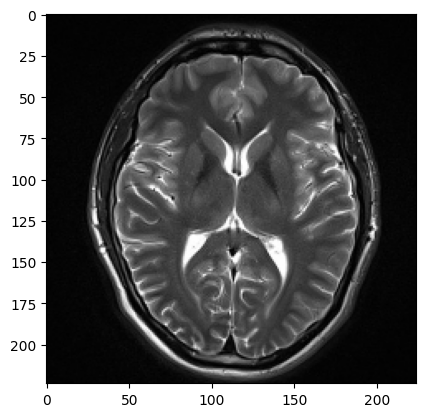

In [7]:
plt.imshow(X[33])

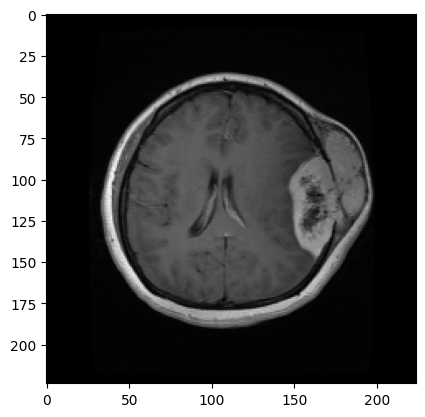

In [6]:
plt.imshow(X[33])

In [7]:
Y[1:10]

array([1, 1, 1, 1, 1, 1, 0, 1, 0])

In [8]:
print(X.shape,Y.shape)

(4288, 224, 224, 3) (4288,)


In [6]:
model1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),input_shape=(224,224,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [7]:
model1.compile(loss='binary_crossentropy',
             optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [9]:
det=model1.fit(X,Y,epochs=10,validation_split=0.2,batch_size=500,shuffle=True)

Epoch 1/10
10/10 [==============================] - 119s 9s/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 2.7650e-04 - val_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 97s 9s/step - loss: 4.8690e-04 - accuracy: 1.0000 - val_loss: 1.1936e-04 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 106s 10s/step - loss: 4.7326e-04 - accuracy: 1.0000 - val_loss: 2.7720e-04 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 111s 11s/step - loss: 1.1514e-04 - accuracy: 1.0000 - val_loss: 7.1057e-05 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 107s 11s/step - loss: 4.0806e-05 - accuracy: 1.0000 - val_loss: 3.9533e-05 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 97s 9s/step - loss: 1.9893e-05 - accuracy: 1.0000 - val_loss: 3.2390e-05 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 94s 9s/step - loss: 1.3278e-05 - accuracy: 1.0000 - val_l

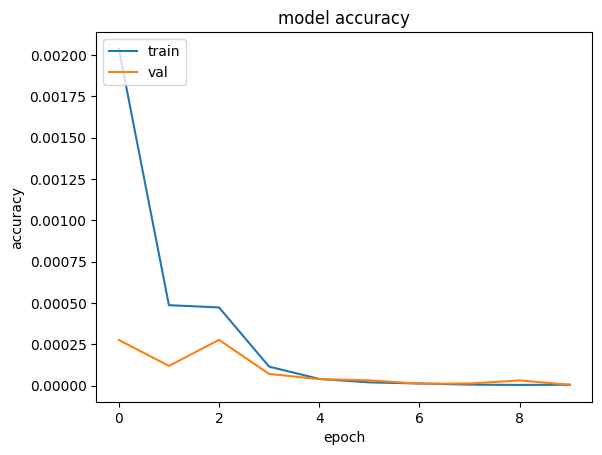

In [15]:
from matplotlib import pyplot as plt
plt.plot(det.history['loss'])
plt.plot(det.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [2]:
model1.save('new_mri_det.h5')

NameError: name 'model1' is not defined

In [10]:
test_img='/media/ram/ubuntuspace/Explore/mechine/paper/MRI_brain_IMG/brain_tumor_dataset/Testing/no_tumor/image(1).jpg'
#tt_im="F:/Explore/mechine/paper/dataset/data/20058.jpg"
#test_img="/media/ram/ubuntuspace/Exprement/saturn/pro/brain_mri_process/yolov5/data/images/image(14).jpg"

model1=load_model('mri_det.h5')
#test_img=tt_im
test_img=sculptdata(test_img)
test_img=np.array(test_img).reshape(-1,224,224,3)
det=model1.predict(test_img)
res=np.amax(det)
print(res)

2023-05-15 11:19:44.468869: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-15 11:19:44.477986: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: xXramXx
2023-05-15 11:19:44.478039: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: xXramXx
2023-05-15 11:19:44.483975: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 525.105.17
2023-05-15 11:19:44.519405: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: NOT_FOUND: could not find kernel module information in driver version file contents: "NVRM version: NVIDIA UNIX Open Kernel Module for x86_64  525.105.17  Release Build  (dvs-builder@U16-T02-30-1)  Tue Mar 28 22:29:15 UTC 2023
GCC version:  gcc version 11.3.0 (Ubuntu 11.3.0-1ubuntu

1/1 [==============================] - 2s 2s/step
0.9999917


In [34]:
if res > 0.5:
    sub=['no_tumor','glioma_tumor','meningioma_tumor','pituitary_tumor']
    res1=model1.predict(test_img)
    pro=np.amax(res1)
    val=np.argmax(res1)
    print("There is ",'%.2f'%(pro*100),"% probability,it is",sub[val].upper())
else :
    print("This image isnt mri image of brain!!! select other proper image")

1/1 [==============================] - 0s 22ms/step
There is  100.00 % probability,it is NO_TUMOR


In [13]:
from os import listdir
from sys import path_importer_cache


dataset=[]
pat="/media/ram/ubuntuspace/Explore/mechine/paper/MRI_brain_IMG/brain_tumor_dataset/Training"
#pat="F:/Explore/mech/paper/MRI_brain_IMG/brain_tumor_dataset/Training/"
sub=['no_tumor','glioma_tumor','meningioma_tumor','pituitary_tumor']

for i in sub:
    a=os.path.join(pat,i)
    lab=sub.index(i)
    for j in listdir(a):
        fil=os.path.join(a,j)
        img=sculptdata(fil)
        dataset.append([img,lab])

In [14]:
Y[0:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

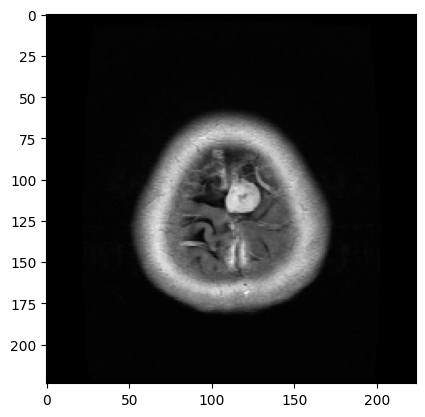

In [12]:
plt.imshow(X[2])

In [19]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),input_shape=(224,224,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(4,activation='sigmoid')
])

In [20]:
model.compile(loss='SparseCategoricalCrossentropy',
             optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [21]:
pre=model.fit(X,Y,epochs=10,validation_split=0.2,batch_size=50,shuffle=True)

Epoch 1/10
94/94 [==============================] - 101s 1s/step - loss: 0.9910 - accuracy: 0.9500 - val_loss: 0.0196 - val_accuracy: 0.9966
Epoch 2/10
94/94 [==============================] - 98s 1s/step - loss: 0.0687 - accuracy: 0.9859 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 3/10
94/94 [==============================] - 97s 1s/step - loss: 0.1049 - accuracy: 0.9876 - val_loss: 0.0098 - val_accuracy: 0.9974
Epoch 4/10
94/94 [==============================] - 105s 1s/step - loss: 0.0424 - accuracy: 0.9934 - val_loss: 0.0062 - val_accuracy: 0.9983
Epoch 5/10
94/94 [==============================] - 116s 1s/step - loss: 0.0311 - accuracy: 0.9947 - val_loss: 0.0043 - val_accuracy: 0.9983
Epoch 6/10
94/94 [==============================] - 110s 1s/step - loss: 0.0114 - accuracy: 0.9968 - val_loss: 8.5934e-04 - val_accuracy: 1.0000
Epoch 7/10
94/94 [==============================] - 114s 1s/step - loss: 0.0531 - accuracy: 0.9934 - val_loss: 0.0117 - val_accuracy: 0.9974
Epoch 8/10


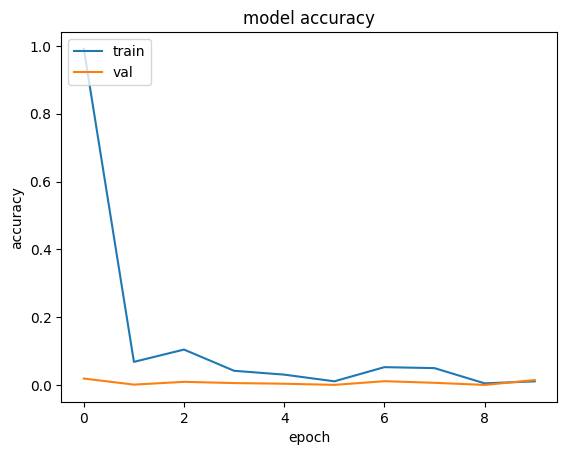

In [24]:
plt.plot(pre.history['loss'])
plt.plot(pre.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
model.save('new_mri_calss.h5')

In [18]:
! pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.1/585.1 KB 764.7 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 KB 319.3 kB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 KB 1.3 MB/s eta 0:00:002.5 MB/s eta 0:00:01


In [19]:
from ultralytics import YOLO
model3 = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)
model3.conf=0.60
model2=load_model("/media/ram/ubuntuspace/Exprement/saturn/pro/brain_mri_process/mri_calss.h5")

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/ram/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-5-15 Python-3.10.6 torch-1.13.1+cu117 CPU



requirements: /home/ram/.local/lib/python3.10/site-packages/requirements.txt not found, check failed.


Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [6]:
from ultralytics import YOLO
model3 = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)
model3.conf=0.60
model2=load_model("/media/ram/ubuntuspace/Exprement/saturn/pro/brain_mri_process/mri_calss.h5")

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/ram/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-10-17 Python-3.10.12 torch-1.13.1+cu117 CPU

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 
2023-10-17 17:13:28.557611: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-10-17 17:13:28.557647: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: xXramXx
2023-10-17 17:13:28.557654: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: xXramXx
2023-10-17 17:13:28.639682: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 525.125.6
2023-10-17 17:13:28.673981: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: NOT_

1/1 [==============================] - 0s 82ms/step
There is  100.00 % it is  PITUITARY_TUMOR


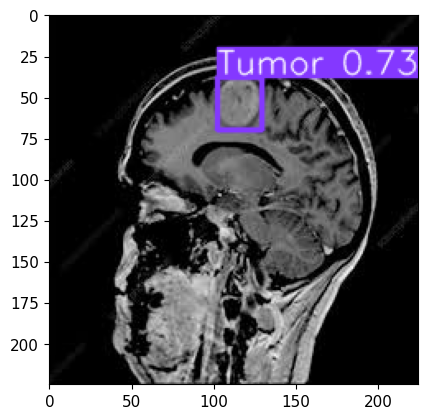

In [22]:
%matplotlib inline 
sub=['glioma_tumor','meningioma_tumor','pituitary_tumor','no_tumor']
test_img_1="/media/ram/ubuntuspace/Exprement/saturn/pro/brain_mri_process/yolov5/data/images/image(19).jpg"
#test_img_1='/media/ram/ubuntuspace/Explore/mechine/paper/MRI_brain_IMG/brain_tumor_dataset/Testing/pituitary_tumor/image(15).jpg'
oo=sculptdata(test_img_1)
test_img=np.array(oo).reshape(-1,224,224,3)

res=model2.predict(test_img)
pro=np.amax(res)
val=np.argmax(res)
print("There is ",'%.2f'%(pro*100),'%',"it is ",sub[2].upper())
results = model3(test_img_1)
plt.imshow(np.squeeze(results.render()))
plt.show()

1/1 [==============================] - 0s 186ms/step
There is  100.00 % it is  GLIOMA_TUMOR


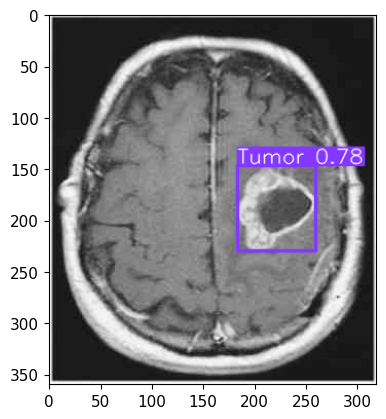

In [20]:
%matplotlib inline 
sub=['glioma_tumor','meningioma_tumor','pituitary_tumor','no_tumor']
test_img_1="/media/ram/ubuntuspace/Exprement/saturn/pro/brain_mri_process/yolov5/data/images/image(29).jpg"
#test_img_1='/media/ram/ubuntuspace/Explore/mechine/paper/MRI_brain_IMG/brain_tumor_dataset/Testing/pituitary_tumor/image(15).jpg'

res=model2.predict(test_img)
pro=np.amax(res)
val=np.argmax(res)
print("There is ",'%.2f'%(pro*100),'%',"it is ",sub[val].upper())
results = model3(test_img_1)
plt.imshow(np.squeeze(results.render()))
plt.show()